In [53]:
import numpy as np
import matplotlib.pyplot as plot
import random
import time
import h5py
from scipy.signal import find_peaks


In [79]:
#read in file name
filename = "/sdf/data/lcls/ds/xcs/xcsx48919/hdf5/smalldata/xcsx48919_Run0169.h5"

exp = 'xcsx48919'
run = 169

f = h5py.File(filename,'r')

#just printing out types of data in the file
def print_name(name, obj):
    if isinstance(obj, h5py.Dataset):
        print('Dataset:', name)
    elif isinstance(obj, h5py.Group):
        print('Group:', name)

with h5py.File(filename, 'r')  as h5f: # file will be closed when we exit from WITH scope
    h5f.visititems(print_name) # print all structure names

Group: Sums
Dataset: Sums/acq01_calib
Dataset: Sums/acq01_calib_dropped
Dataset: Sums/acq01_calib_dropped_square
Group: UserDataCfg
Group: UserDataCfg/EOrbits
Dataset: UserDataCfg/EOrbits/detname
Dataset: UserDataCfg/EOrbits/name
Group: UserDataCfg/acq01
Dataset: UserDataCfg/acq01/ROI_0__ROI_0_bound
Dataset: UserDataCfg/acq01/ROI_0__ROI_0_name
Dataset: UserDataCfg/acq01/ROI_0__ROI_0_writeArea
Dataset: UserDataCfg/acq01/applyMask
Dataset: UserDataCfg/acq01/dataAccessTime
Dataset: UserDataCfg/acq01/delayTime
Dataset: UserDataCfg/acq01/fullScale
Dataset: UserDataCfg/acq01/interval
Dataset: UserDataCfg/acq01/maskCentral
Dataset: UserDataCfg/acq01/nSamples
Dataset: UserDataCfg/acq01/offset
Dataset: UserDataCfg/acq01/run
Group: UserDataCfg/damage
Dataset: UserDataCfg/damage/detAlias
Dataset: UserDataCfg/damage/detNames
Dataset: UserDataCfg/damage/name
Group: UserDataCfg/diodeGon
Dataset: UserDataCfg/diodeGon/detname
Dataset: UserDataCfg/diodeGon/name
Dataset: UserDataCfg/diodeGon/savePos
Gro

ipm [267668.25  263369.75  274009.625 ... 280239.375 269691.5   311127.   ]
shape (25562, 4, 4000)


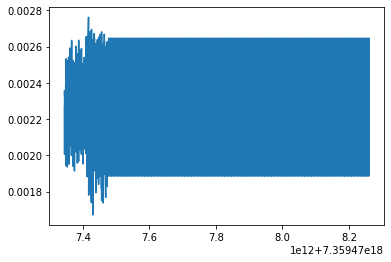

In [80]:
#opening relevant data from the h5 file
with h5py.File(filename, 'r')  as h5f: # file will be closed when we exit from WITH scope
    sums_acq01 = h5f['Sums/acq01_calib'][()]
    acq01_data = h5f['acq01/ROI_0_area'][()]
    acq01_mean = h5f['acq01/ROI_0_mean'][()]
    time = h5f['event_time'][()]
    ipm5 = h5f['UserDataCfg/damage/detNames'][()]
    #ipm = h5f['ipm4/sum'][()]

#print("time", time[1:10000]) #10:110])
#print("acq01_data", acq01_data[1:1000]) #[10:110])
print("ipm", ipm)

acq_len = len(acq01_data)
#print("acq01_data",acq01_data)
print("shape", acq01_data.shape) #first dimension is number of events, second dim is channel number, 3rd dim is waveform. At each event there is a trigger that then takes 4000 waveform lines
#print("ipm len", len(ipm))
fig, ax1 = plot.subplots()
ax1.plot(time[1:],acq01_mean[1:]) 
#ax1.plot(time[1:],ipm[1:])

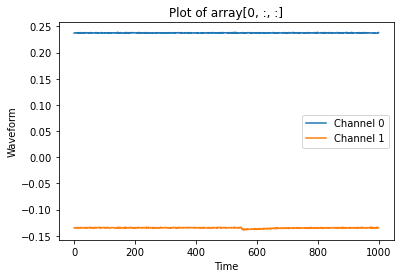

In [4]:
"""
import matplotlib.pyplot as plt
#rolling average over n (100ish) events 
#identify the peaks and onset event
# Plot the data along the third dimension for all rows at a specific index in the first dimension


i = 0
j = 2000
k = 3500
#for i in range (0,1):
  # index along the first dimension
    #print("i", i)
    #for j in range(array.shape[1]):  # loop through the second dimension (4 rows)
waveforms_subset_0 = acq01_data[j:k, 0, :1000]
waveforms_subset_1 = acq01_data[j:k, 1, :1000]
average_waveform_0 = np.mean(waveforms_subset_0, axis=0)
average_waveform_1 = np.mean(waveforms_subset_1, axis=0)
plt.plot(average_waveform_0, label=f'Channel {0}')
plt.plot(average_waveform_1, label=f'Channel {1}')
    
    #plt.plot(acq01_data[i, 2, :], label=f'Channel {2}')
    #plt.plot(acq01_data[i, 3, :], label=f'Channel {3}')

plt.title(f'Plot of array[{i}, :, :]')
plt.xlabel('Time')
plt.ylabel('Waveform')
plt.legend()
plt.show()
#i = i + 1
"""



avg_baseline_0 0.23784581705729183
baseline_1 -0.1342964111328125
Waveform Indices of ch0 peaks: [621]
Values of ch0 peaks: [0.01961268]
Waveform Indices of ch1 peaks: [563]
Values of ch1 peaks: [0.03789597]
Index range of event numbers: 1800-1900


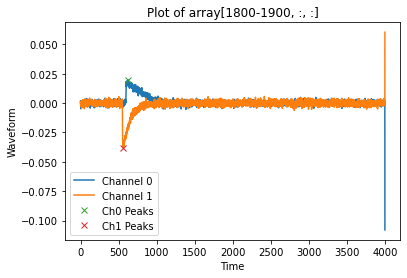

Waveform Indices of ch0 peaks: [603]
Values of ch0 peaks: [0.01830653]
Waveform Indices of ch1 peaks: [554]
Values of ch1 peaks: [0.0356865]
Index range of event numbers: 1900-2000


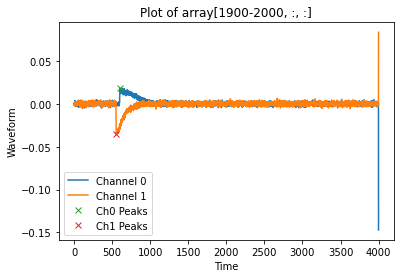

Waveform Indices of ch0 peaks: [671]
Values of ch0 peaks: [0.01520594]
Waveform Indices of ch1 peaks: [564]
Values of ch1 peaks: [0.03645554]
Index range of event numbers: 2000-2100


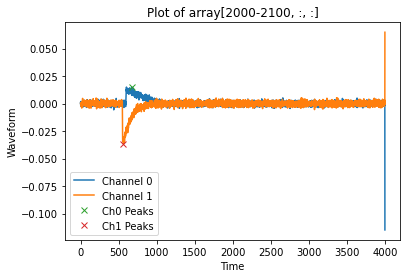

Waveform Indices of ch0 peaks: [675]
Values of ch0 peaks: [0.01410731]
Waveform Indices of ch1 peaks: [559]
Values of ch1 peaks: [0.03462449]
Index range of event numbers: 2100-2200


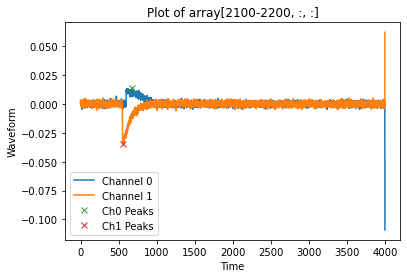

Waveform Indices of ch0 peaks: []
Values of ch0 peaks: []
Waveform Indices of ch1 peaks: [562]
Values of ch1 peaks: [0.03468552]
Index range of event numbers: 2200-2300


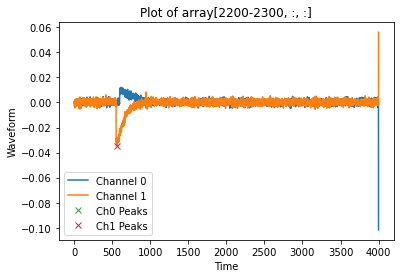

Waveform Indices of ch0 peaks: [630]
Values of ch0 peaks: [0.01554774]
Waveform Indices of ch1 peaks: [566]
Values of ch1 peaks: [0.03567429]
Index range of event numbers: 2300-2400


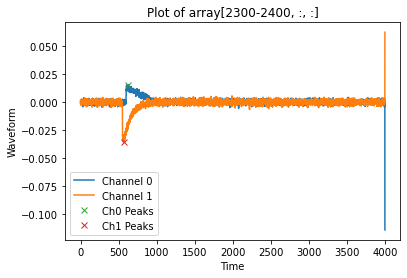

Waveform Indices of ch0 peaks: [649]
Values of ch0 peaks: [0.01394862]
Waveform Indices of ch1 peaks: [576]
Values of ch1 peaks: [0.03535691]
Index range of event numbers: 2400-2500


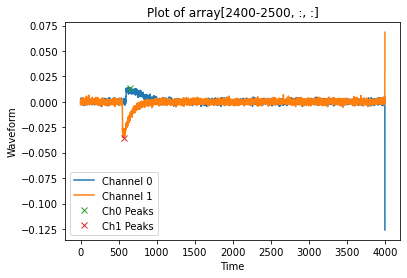

Waveform Indices of ch0 peaks: [637]
Values of ch0 peaks: [0.01435145]
Waveform Indices of ch1 peaks: [557]
Values of ch1 peaks: [0.0349907]
Index range of event numbers: 2500-2600


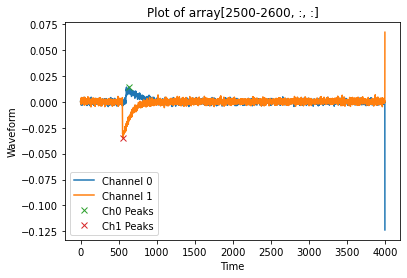

Waveform Indices of ch0 peaks: [608]
Values of ch0 peaks: [0.01433924]
Waveform Indices of ch1 peaks: [555]
Values of ch1 peaks: [0.0351738]
Index range of event numbers: 2600-2700


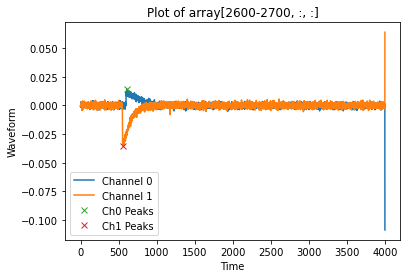

Waveform Indices of ch0 peaks: [607]
Values of ch0 peaks: [0.01761073]
Waveform Indices of ch1 peaks: [560]
Values of ch1 peaks: [0.03693162]
Index range of event numbers: 2700-2800


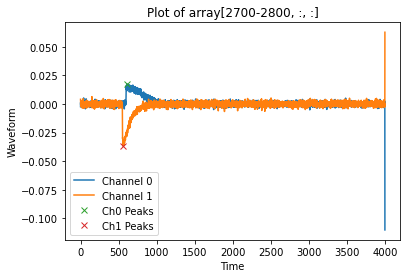

Waveform Indices of ch0 peaks: [606]
Values of ch0 peaks: [0.01697596]
Waveform Indices of ch1 peaks: [562]
Values of ch1 peaks: [0.03815232]
Index range of event numbers: 2800-2900


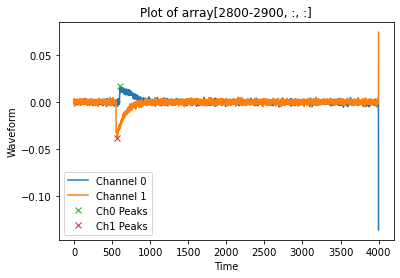

Waveform Indices of ch0 peaks: [619]
Values of ch0 peaks: [0.0140951]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.03225632]
Index range of event numbers: 2900-3000


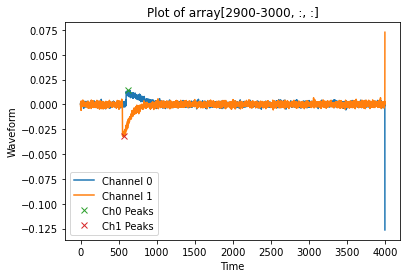

Waveform Indices of ch0 peaks: [607]
Values of ch0 peaks: [0.01660975]
Waveform Indices of ch1 peaks: [563]
Values of ch1 peaks: [0.03632126]
Index range of event numbers: 3000-3100


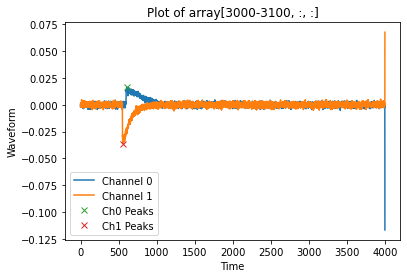

Waveform Indices of ch0 peaks: [605]
Values of ch0 peaks: [0.01415614]
Waveform Indices of ch1 peaks: [574]
Values of ch1 peaks: [0.03391648]
Index range of event numbers: 3100-3200


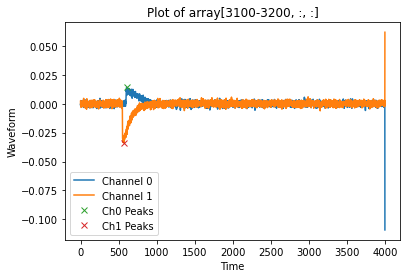

Waveform Indices of ch0 peaks: [603]
Values of ch0 peaks: [0.0170492]
Waveform Indices of ch1 peaks: [559]
Values of ch1 peaks: [0.03611375]
Index range of event numbers: 3200-3300


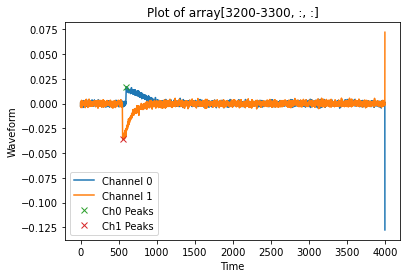

Waveform Indices of ch0 peaks: [619]
Values of ch0 peaks: [0.01258143]
Waveform Indices of ch1 peaks: [559]
Values of ch1 peaks: [0.03173142]
Index range of event numbers: 3300-3400


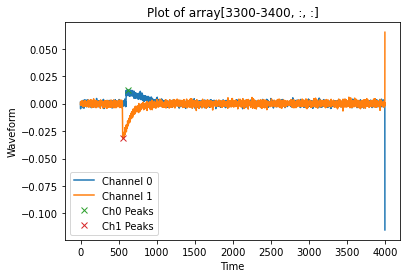

Waveform Indices of ch0 peaks: []
Values of ch0 peaks: []
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.03438035]
Index range of event numbers: 3400-3500


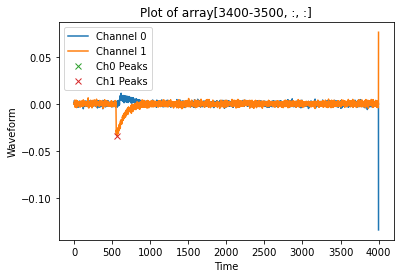

Waveform Indices of ch0 peaks: [619]
Values of ch0 peaks: [0.01437586]
Waveform Indices of ch1 peaks: [564]
Values of ch1 peaks: [0.03500291]
Index range of event numbers: 3500-3600


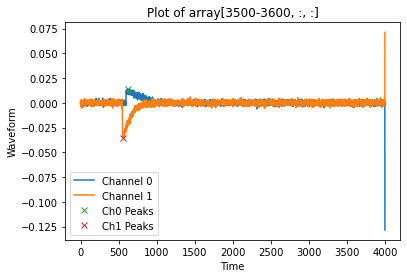

Waveform Indices of ch0 peaks: [645]
Values of ch0 peaks: [0.01319178]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.03596726]
Index range of event numbers: 3600-3700


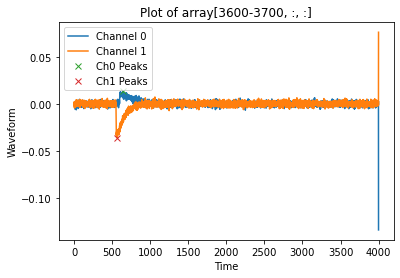

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01452235]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.0374321]
Index range of event numbers: 3700-3800


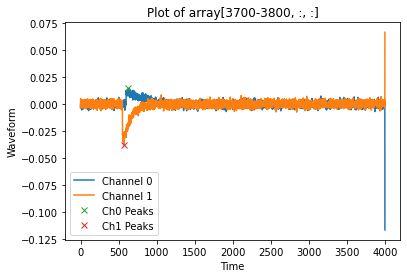

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01447352]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.03727341]
Index range of event numbers: 3800-3900


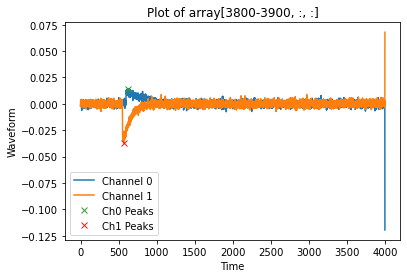

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01328944]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.03607712]
Index range of event numbers: 3900-4000


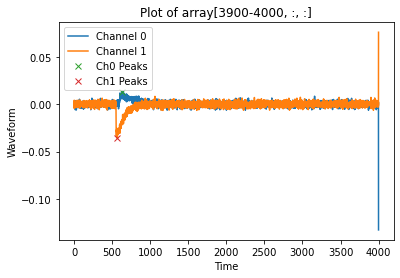

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01452235]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.0374321]
Index range of event numbers: 4000-4100


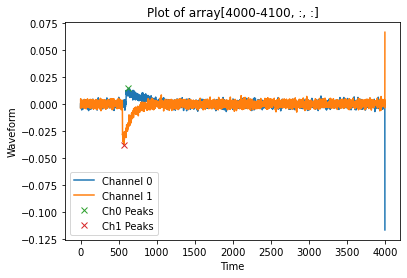

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01447352]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.03727341]
Index range of event numbers: 4100-4200


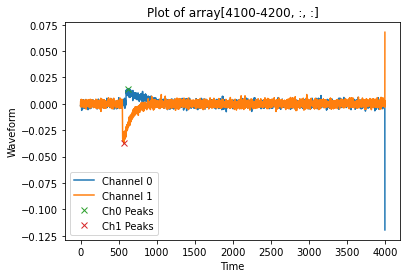

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01328944]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.03607712]
Index range of event numbers: 4200-4300


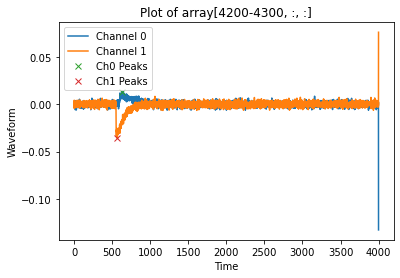

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01452235]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.0374321]
Index range of event numbers: 4300-4400


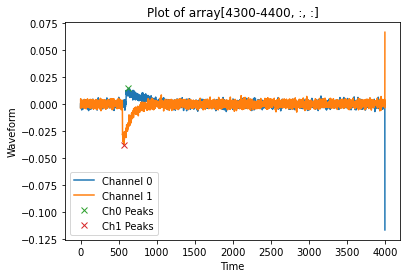

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01447352]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.03727341]
Index range of event numbers: 4400-4500


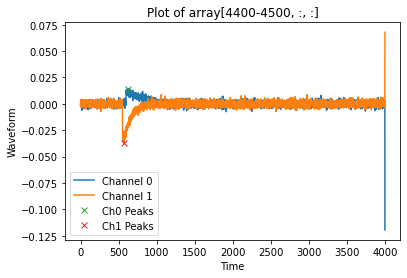

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01328944]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.03607712]
Index range of event numbers: 4500-4600


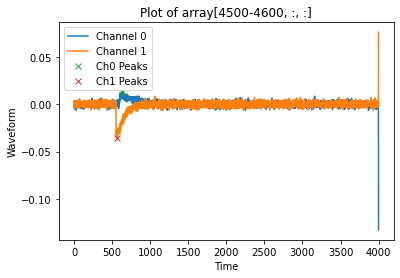

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01452235]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.0374321]
Index range of event numbers: 4600-4700


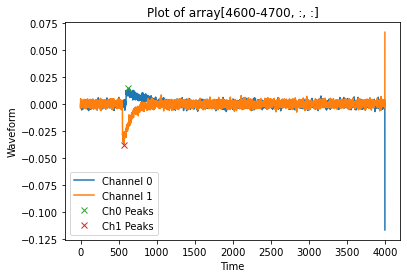

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01447352]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.03727341]
Index range of event numbers: 4700-4800


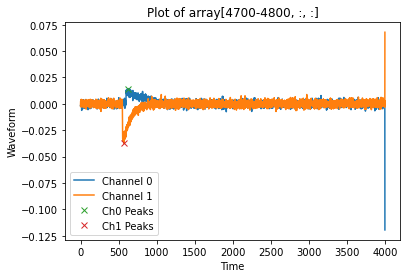

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01328944]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.03607712]
Index range of event numbers: 4800-4900


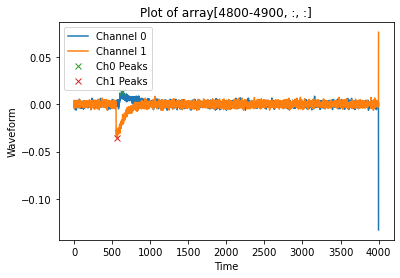

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01452235]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.0374321]
Index range of event numbers: 4900-5000


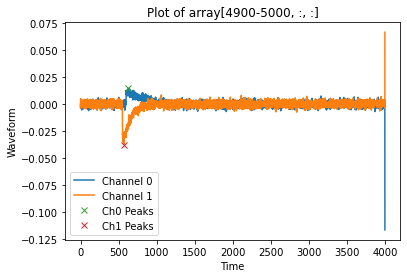

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01447352]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.03727341]
Index range of event numbers: 5000-5100


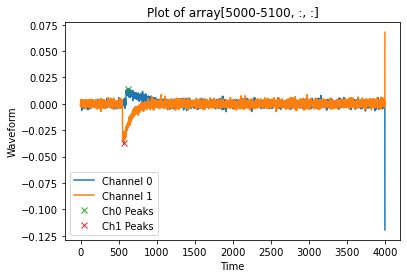

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01328944]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.03607712]
Index range of event numbers: 5100-5200


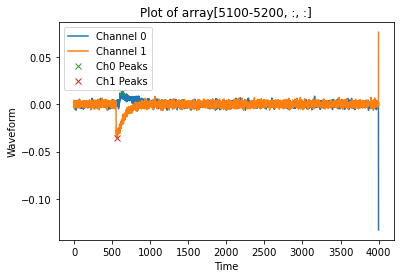

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01452235]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.0374321]
Index range of event numbers: 5200-5300


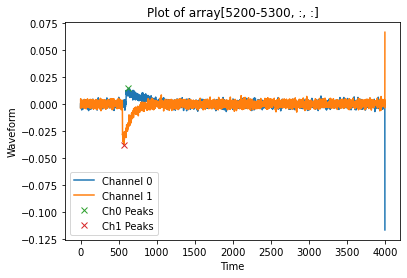

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01447352]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.03727341]
Index range of event numbers: 5300-5400


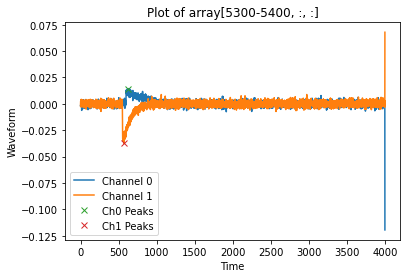

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01328944]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.03607712]
Index range of event numbers: 5400-5500


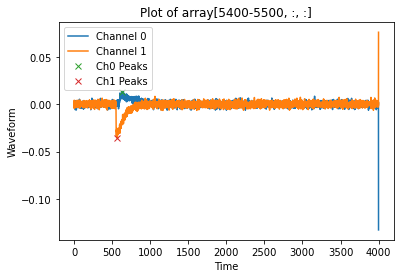

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01452235]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.0374321]
Index range of event numbers: 5500-5600


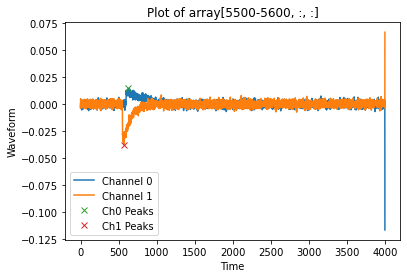

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01447352]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.03727341]
Index range of event numbers: 5600-5700


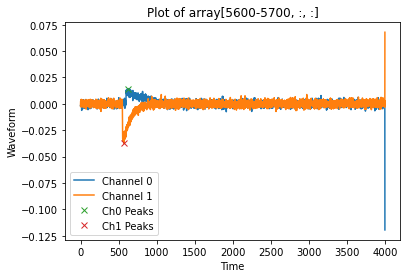

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01328944]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.03607712]
Index range of event numbers: 5700-5800


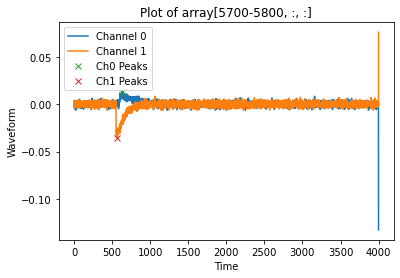

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01452235]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.0374321]
Index range of event numbers: 5800-5900


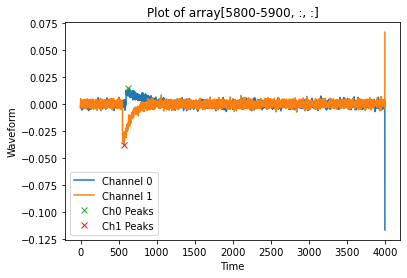

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01447352]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.03727341]
Index range of event numbers: 5900-6000


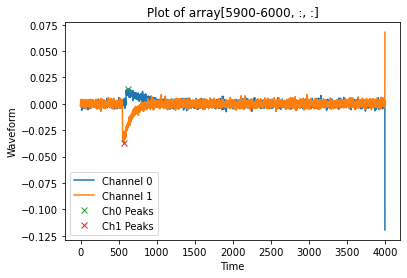

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01328944]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.03607712]
Index range of event numbers: 6000-6100


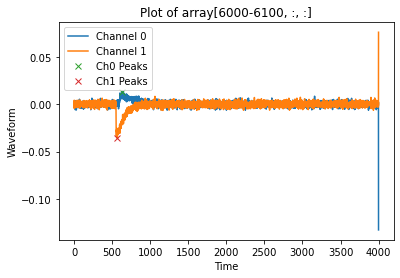

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01452235]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.0374321]
Index range of event numbers: 6100-6200


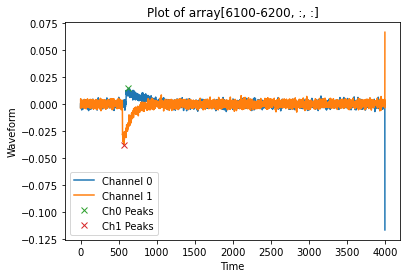

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01447352]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.03727341]
Index range of event numbers: 6200-6300


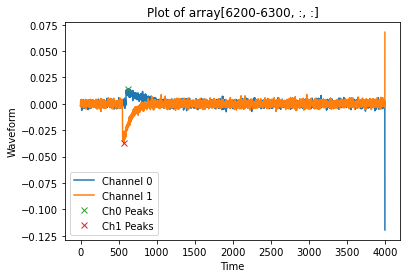

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01328944]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.03607712]
Index range of event numbers: 6300-6400


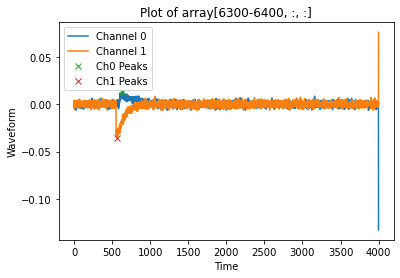

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01452235]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.0374321]
Index range of event numbers: 6400-6500


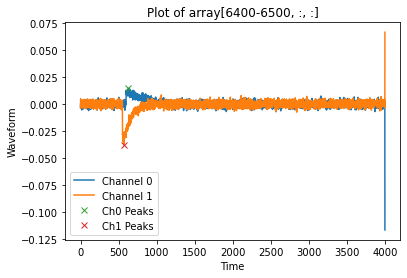

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01447352]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.03727341]
Index range of event numbers: 6500-6600


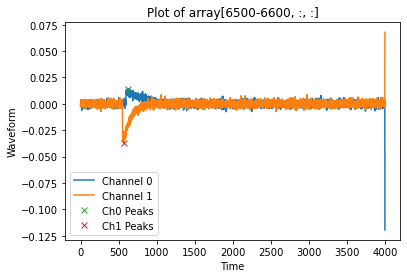

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01328944]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.03607712]
Index range of event numbers: 6600-6700


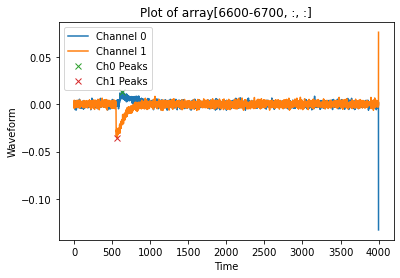

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01452235]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.0374321]
Index range of event numbers: 6700-6800


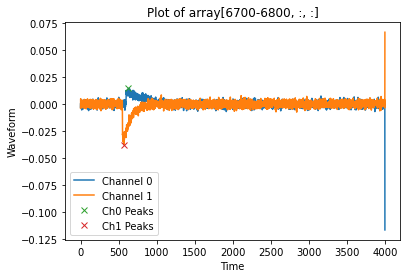

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01447352]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.03727341]
Index range of event numbers: 6800-6900


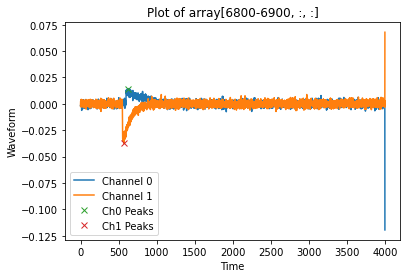

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01328944]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.03607712]
Index range of event numbers: 6900-7000


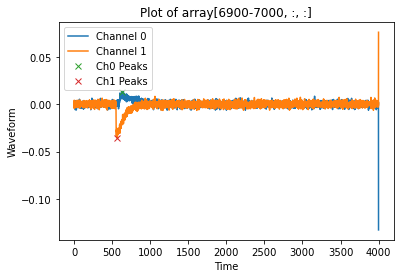

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01452235]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.0374321]
Index range of event numbers: 7000-7100


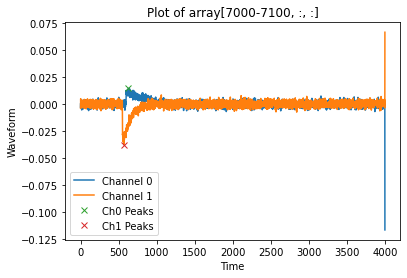

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01447352]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.03727341]
Index range of event numbers: 7100-7200


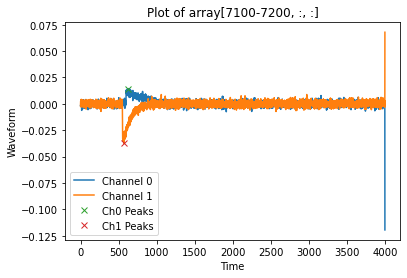

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01328944]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.03607712]
Index range of event numbers: 7200-7300


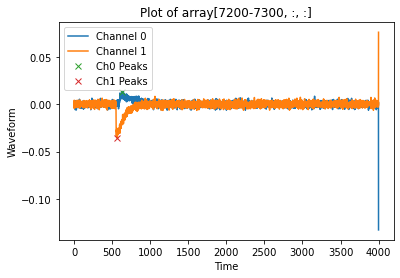

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01452235]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.0374321]
Index range of event numbers: 7300-7400


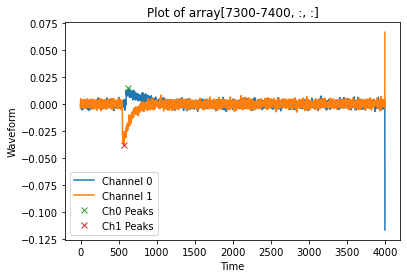

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01447352]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.03727341]
Index range of event numbers: 7400-7500


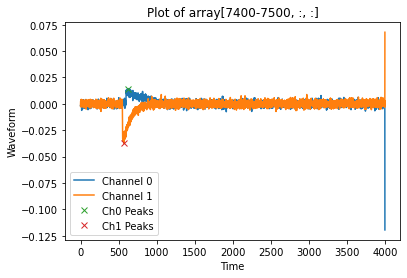

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01328944]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.03607712]
Index range of event numbers: 7500-7600


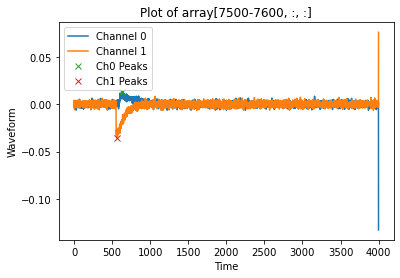

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01452235]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.0374321]
Index range of event numbers: 7600-7700


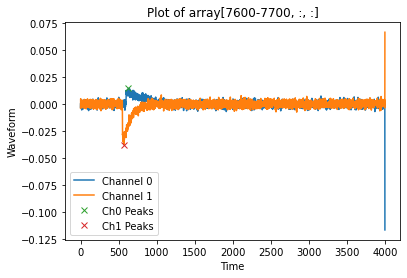

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01447352]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.03727341]
Index range of event numbers: 7700-7800


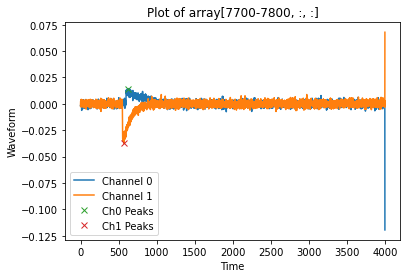

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01328944]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.03607712]
Index range of event numbers: 7800-7900


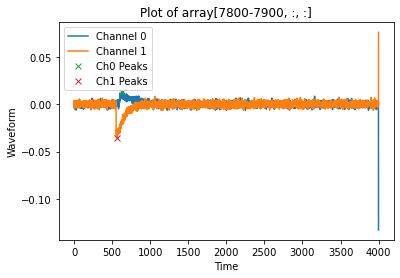

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01452235]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.0374321]
Index range of event numbers: 7900-8000


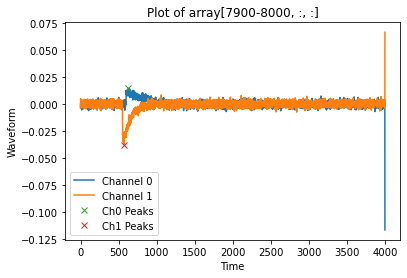

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01447352]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.03727341]
Index range of event numbers: 8000-8100


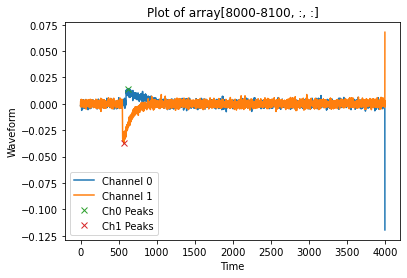

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01328944]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.03607712]
Index range of event numbers: 8100-8200


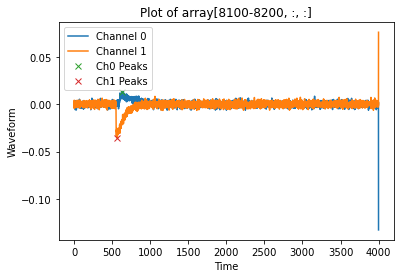

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01452235]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.0374321]
Index range of event numbers: 8200-8300


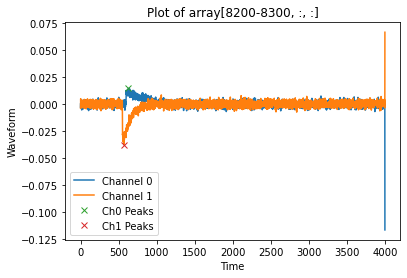

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01447352]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.03727341]
Index range of event numbers: 8300-8400


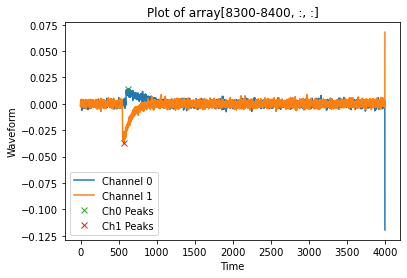

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01328944]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.03607712]
Index range of event numbers: 8400-8500


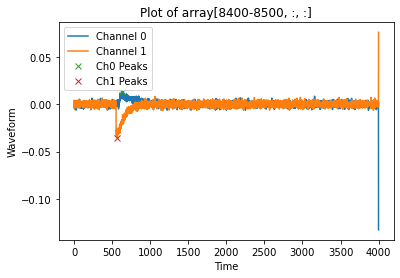

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01452235]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.0374321]
Index range of event numbers: 8500-8600


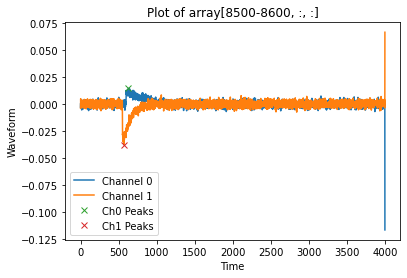

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01447352]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.03727341]
Index range of event numbers: 8600-8700


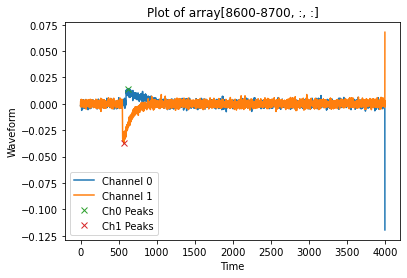

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01328944]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.03607712]
Index range of event numbers: 8700-8800


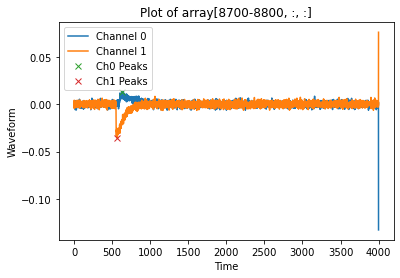

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01452235]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.0374321]
Index range of event numbers: 8800-8900


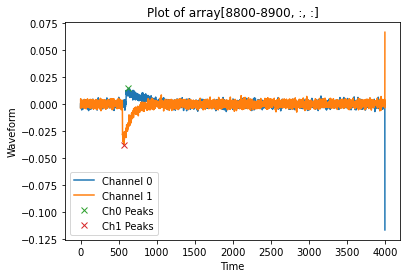

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01447352]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.03727341]
Index range of event numbers: 8900-9000


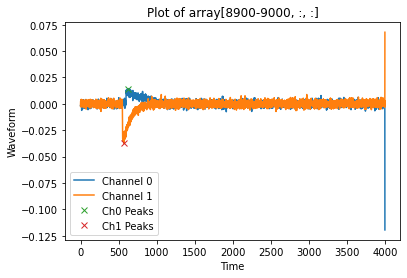

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01328944]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.03607712]
Index range of event numbers: 9000-9100


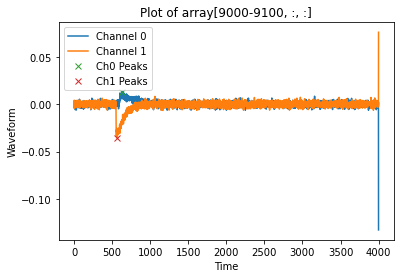

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01452235]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.0374321]
Index range of event numbers: 9100-9200


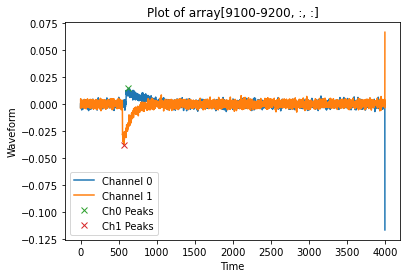

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01447352]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.03727341]
Index range of event numbers: 9200-9300


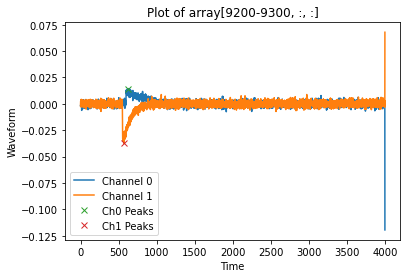

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01328944]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.03607712]
Index range of event numbers: 9300-9400


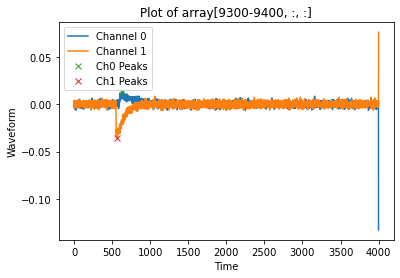

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01452235]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.0374321]
Index range of event numbers: 9400-9500


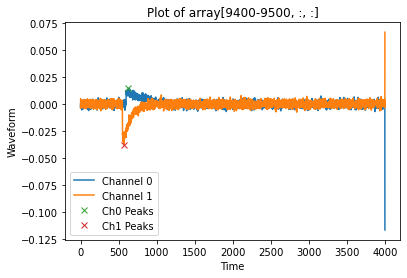

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01447352]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.03727341]
Index range of event numbers: 9500-9600


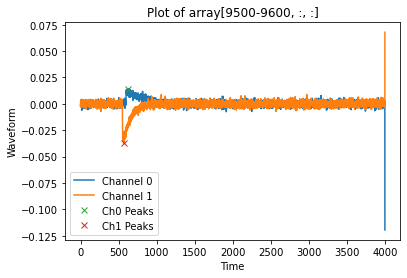

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01328944]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.03607712]
Index range of event numbers: 9600-9700


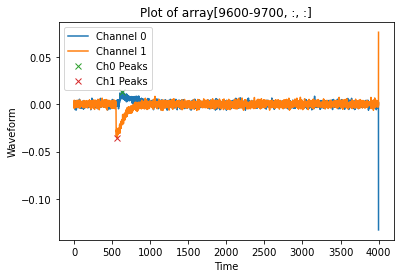

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01452235]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.0374321]
Index range of event numbers: 9700-9800


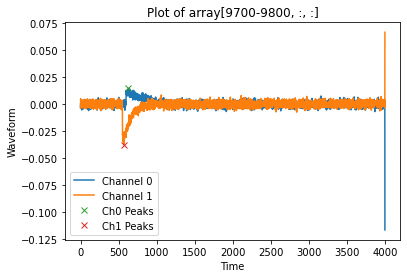

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01447352]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.03727341]
Index range of event numbers: 9800-9900


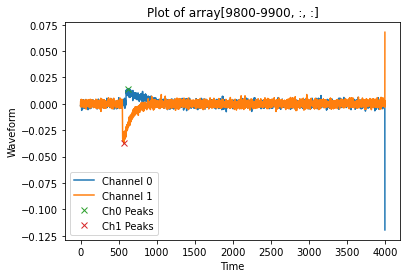

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01328944]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.03607712]
Index range of event numbers: 9900-10000


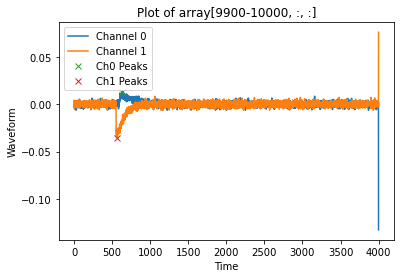

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01452235]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.0374321]
Index range of event numbers: 10000-10100


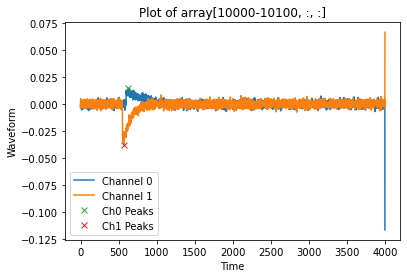

Waveform Indices of ch0 peaks: [629]
Values of ch0 peaks: [0.01447352]
Waveform Indices of ch1 peaks: [568]
Values of ch1 peaks: [0.03727341]
Index range of event numbers: 10100-10200


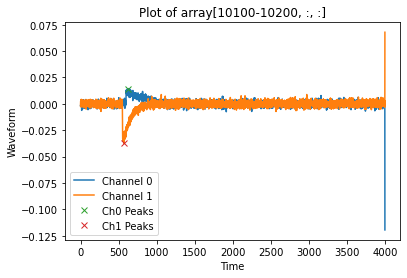

In [ ]:
import matplotlib.pyplot as plt
avg_nEvents = 100 #number of events to average over

total_events = len(acq01_mean) #total number of events
height_threshold_0 = 0.25 #peak threshold ch0
height_threshold_1 = 0.15 #peak threshold ch1
distance_between_peaks = 500 

#find baseline to calibrate waveform to 0
baseline_0 = acq01_data[0:100, 0, 2000:3500]
baseline_1 = acq01_data[0:100, 1, 2000:3500]
avg_baseline_0 = np.mean(baseline_0)
avg_baseline_1 = np.mean(baseline_1)

print("avg_baseline_0", avg_baseline_0)
print("baseline_1", avg_baseline_1)

#looping through the events and averaging, then plotting events that contain peaks
for start in range(0,total_events, avg_nEvents):
    end = start + avg_nEvents
    #print("start", start)
    #print("end", end)
   
    #averaging the waveforms
    waveforms_subset_0 = acq01_data[start:end, 0, :]
    waveforms_subset_1 = acq01_data[start:end, 1, :]
    average_waveform_0 = np.mean(waveforms_subset_0, axis=0)
    average_waveform_1 = -np.mean(waveforms_subset_1, axis=0) #invert waveform because peakfinder only finds maximum peaks
    

    
    #find the peaks
    peaks0, properties = find_peaks(average_waveform_0, height=height_threshold_0, distance=distance_between_peaks)
    peaks1, properties = find_peaks(average_waveform_1, height=height_threshold_1, distance=distance_between_peaks) 
    

    #if average_waveform_1[peaks1] > height_threshold:
    #print(f'Indices of ch0 peaks: {peaks0}')
    #print(f'Values of ch0 peaks: {average_waveform_0[peaks0]}')
    #print(f'Indices of ch1 peaks: {peaks1}')
    #print(f'Values of ch1 peaks: {average_waveform_1[peaks1]}')
    #print(f'Indices of event number: {start}')   
    
    #only plot events if there were peaks found in the waveform
    if (peaks0.size>0) | (peaks1.size>0):
        print(f'Waveform Indices of ch0 peaks: {peaks0}')
        print(f'Values of ch0 peaks: {average_waveform_0[peaks0]-avg_baseline_0}')
        print(f'Waveform Indices of ch1 peaks: {peaks1}')
        print(f'Values of ch1 peaks: {average_waveform_1[peaks1]+avg_baseline_1}')
        print(f'Index range of event numbers: {start}-{end}')
        plt.plot(average_waveform_0-avg_baseline_0, label=f'Channel {0}')
        plt.plot(-(average_waveform_1+avg_baseline_1), label=f'Channel {1}')
        plt.plot(peaks0, average_waveform_0[peaks0]-avg_baseline_0, "x", label='Ch0 Peaks')
        plt.plot(peaks1, -(average_waveform_1[peaks1]+avg_baseline_1), "x", label='Ch1 Peaks')
   

        plt.title(f'Plot of array[{start}-{end}, :, :]')
        plt.xlabel('Time')
        plt.ylabel('Waveform')
        plt.legend()
        plt.show()
    
    
    
    
        
     
    
    
    